In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### 1. Weekly consumption trends of SM households

IMPUTE THE DATA AND SEE

#### Using 6 hour interval data

In [2]:
all_data = pd.DataFrame()

for root, folder, files in os.walk('/Users/chanukaalgama/Desktop/Lacuna improvements/data/consumption_data/smart_meter/6hour_interval'):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            data = pd.read_csv(file_path, low_memory=False)
            all_data = pd.concat([all_data, data], ignore_index=True)

all_data_filtered = all_data[['household_ID', 'DATE', 'TIME', 'TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)']].copy()

all_data_filtered['TIME'] = all_data_filtered['TIME'].str.extract(r'(\d{2}:\d{2}:\d{2})')

def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 20:
        return 'evening'
    else:
        return 'night'

all_data_filtered['time_cat'] = all_data_filtered['TIME'].apply(categorize_time)
all_data_filtered['TOTAL_IMPORT (kWh)'] = pd.to_numeric(all_data_filtered['TOTAL_IMPORT (kWh)'], errors='coerce')
all_data_filtered['TOTAL_EXPORT (kWh)'] = pd.to_numeric(all_data_filtered['TOTAL_EXPORT (kWh)'], errors='coerce')

In [3]:
all_data

,household_ID,BRANCH,DEPOT,substation_ID,SUB_TYPE,E_BILLING,EXPORT,DATE,TIME,TOTAL_IMPORT (kWh),...,TR1_TOTAL_EXPORT - PV1 (kWh),TR2_TOTAL_EXPORT - PV1 (kWh),TR3_TOTAL_EXPORT - PV1 (kWh),PHASE_A_CURRENT (A),PHASE_A_VOLTAGE (V),FREQUENCY (Hz),PHASE_B_CURRENT (A),PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V)
0,ID5050,MORATUWA,MORATUWA NORTH C.S.C,sub522,Anteleco - DLMS 3Phase,False,True,2024-09-02,00:43:10,1.711,...,4904.267,0.01,0.0,-0.071,226.6001,50.04,0.0711,226.8000,0.073,238.2001
1,ID4269,MORATUWA,KESELWATTA C.S.C,sub194,Anteleco - DLMS SinglePhase,False,False,2024-09-02,01:27:41,2198.669,...,0.000,0.00,0.0,0.0181,232.7001,50.07,NaN,NaN,NaN,NaN
2,ID4255,MORATUWA,KESELWATTA C.S.C,sub179,Anteleco - DLMS SinglePhase,False,False,2024-09-02,01:27:13,11499.709,...,0.000,0.00,0.0,5.4591,230.4,49.86,NaN,NaN,NaN,NaN
3,ID4256,MORATUWA,KESELWATTA C.S.C,sub179,Anteleco - DLMS SinglePhase,False,False,2024-09-02,01:27:09,838.856,...,0.000,0.00,0.0,0.275,228.8,49.85,NaN,NaN,NaN,NaN
4,ID4266,MORATUWA,KESELWATTA C.S.C,sub14,Anteleco - DLMS SinglePhase,False,False,2024-09-02,01:26:33,1787.873,...,0.000,0.00,0.0,0.29,231.4,49.97,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441788,ID5104,MORATUWA,MORATUWA NORTH C.S.C,sub500,Anteleco - DLMS SinglePhase,False,False,2023-06-01,05:38:40,4164.626,...,0.002,0.00,0.0,0.859,234.3,50.04,NaN,NaN,NaN,NaN
4441789,ID1654,MORATUWA,MORATUWA NORTH C.S.C,sub507,Anteleco - DLMS 3Phase,False,False,2023-06-01,05:38:42,1558.68,...,0.000,0.00,0.0,0.0,235.0,49.97,0.4050,238.7001,0.000,234.6001
4441790,ID1729,MORATUWA,MORATUWA NORTH C.S.C,sub544,Anteleco - DLMS SinglePhase,False,False,2023-06-01,05:38:54,3099.812,...,0.000,0.00,0.0,0.708,235.6001,50.04,NaN,NaN,NaN,NaN
4441791,ID3817,MORATUWA,MORATUWA NORTH C.S.C,sub523,Anteleco - DLMS SinglePhase,False,False,2023-06-01,05:39:10,1026.104,...,0.001,0.00,0.0,0.2361,245.4,49.95,NaN,NaN,NaN,NaN


In [11]:
all_data_filtered.isnull().sum()

household_ID           0
DATE                   0
TIME                   0
TOTAL_IMPORT (kWh)    15
TOTAL_EXPORT (kWh)    14
time_cat               0
dtype: int64

In [75]:
'''all the data has been loded to the all_data_filtered as a dataframe, now since each consumption point is a cumulative conusmption we need to substract every datapoint from 
its previous datapoint to get the exact consumption between the timestamps by considering houshold id
'''
# Important: sorting before substracting  
all_data_filtered = all_data_filtered.sort_values(['household_ID', 'DATE', 'TIME'])

all_data_filtered[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)']] = (
    all_data_filtered.groupby('household_ID')[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)']].diff()
)


In [76]:
(all_data_filtered[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)']] < 0).sum()

TOTAL_IMPORT (kWh)    1990227
TOTAL_EXPORT (kWh)     318574
dtype: int64

#### Wow — over 1.9 million negative TOTAL_IMPORT values and 300K+ negative TOTAL_EXPORT? That’s significant

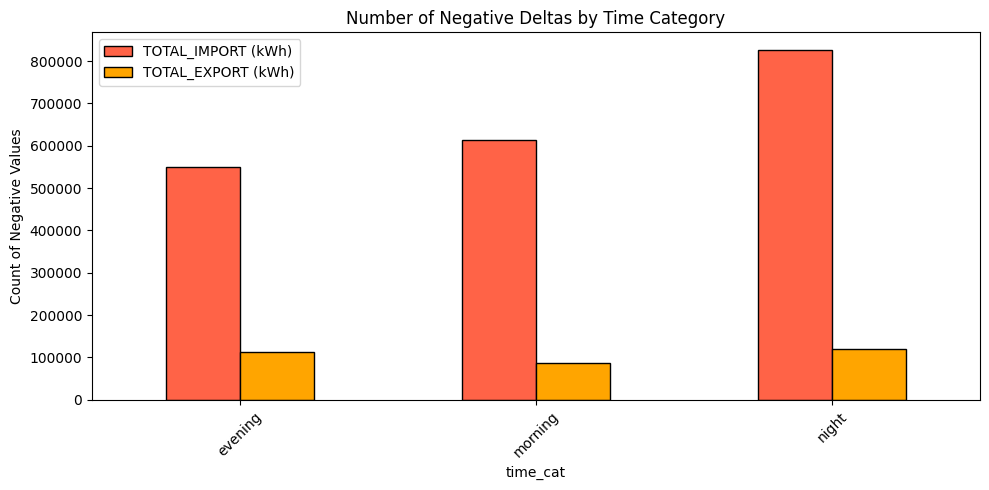

In [77]:
negatives = all_data_filtered[
    (all_data_filtered['TOTAL_IMPORT (kWh)'] < 0) |
    (all_data_filtered['TOTAL_EXPORT (kWh)'] < 0)
]

neg_counts = negatives.groupby('time_cat')[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)']].apply(
    lambda df: (df < 0).sum()
)

neg_counts.plot(kind='bar', figsize=(10, 5), color=['tomato', 'orange'], edgecolor='black')
plt.title("Number of Negative Deltas by Time Category")
plt.ylabel("Count of Negative Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
# clipping to handle negative values
all_data_filtered['TOTAL_IMPORT (kWh)'] = all_data_filtered['TOTAL_IMPORT (kWh)'].clip(lower=0)
all_data_filtered['TOTAL_EXPORT (kWh)'] = all_data_filtered['TOTAL_EXPORT (kWh)'].clip(lower=0)


In [72]:
daily_import = all_data_filtered.groupby('time_cat')['TOTAL_IMPORT (kWh)'].mean()
daily_export = all_data_filtered.groupby('time_cat')['TOTAL_EXPORT (kWh)'].mean()



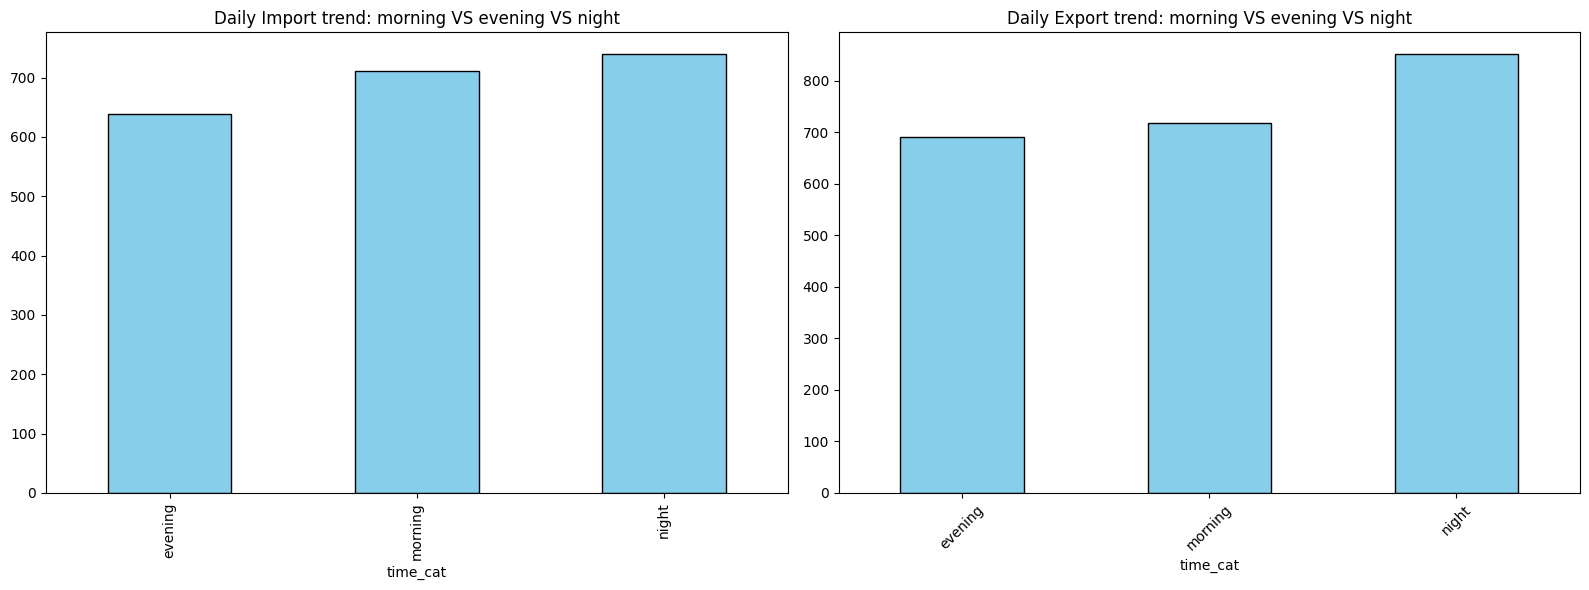

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

daily_import.plot(ax=ax[0], kind='bar', color='skyblue', edgecolor='black')
ax[0].set_title("Daily Import trend: morning VS evening VS night")

daily_export.plot(ax=ax[1], kind='bar', color='skyblue', edgecolor='black')
ax[1].set_title("Daily Export trend: morning VS evening VS night")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Using 15 minute interval data

In [5]:
all_data = pd.DataFrame()

for root, folder, files in os.walk('/Users/chanukaalgama/Desktop/Lacuna improvements/data/consumption_data/smart_meter/15min_interval'):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            data = pd.read_csv(file_path, low_memory=False)
            all_data = pd.concat([all_data, data], ignore_index=True)

,household_ID,timestamp,date,time,obis,importkwh(kwh),exportkwh(kwh),importkvarh(kvarh),exportkvarh(kvarh),powerfactor,avgcurrent(v),avgexportkw(kw),avgimportkw(kw),avgvoltage(v),phaseainstcurrent(a),phaseainstvoltage(v),phasebinstcurrent(a),phasebinstvoltage(v),phasecinstcurrent(a),phasecinstvoltage(v)
0,ID4827,1.696100e+12,2023-10-01,00:00:00,LP,21553.312,0.000,7065.984,22.3990,0.8810,NaN,0.0,1.0653,NaN,0.4771,234.3,1.0071,235.1001,3.656,235.1001
1,ID4336,1.696180e+12,2023-10-01,22:15:00,LP,3434.237,4552.692,1170.657,14.2321,0.8400,NaN,0.0,0.6300,NaN,1.4790,231.4,0.0000,232.0000,0.000,232.3000
2,ID4338,1.696180e+12,2023-10-01,22:15:00,LP,2297.699,11800.846,207.077,104.9830,0.8400,NaN,0.0,0.9665,NaN,1.1050,234.3,0.6870,236.0000,0.969,236.0000
3,ID2420,1.696180e+12,2023-10-01,22:15:00,LP,4436.904,2792.513,324.717,237.0310,0.9591,NaN,0.0,0.7958,NaN,0.1350,226.4,0.9370,237.7001,4.888,222.5000
4,ID4333,1.696180e+12,2023-10-01,22:15:00,LP,15188.885,0.000,3577.259,1.0580,0.8840,NaN,0.0,2.6330,NaN,0.8620,235.3,2.3971,237.0000,9.381,235.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45613275,ID5495,1.722530e+12,2024-08-01,22:45:00,LP,27816.820,15148.470,26.510,48481.2100,0.9030,NaN,NaN,NaN,NaN,4.3230,238.3,2.0590,239.7000,1.155,239.7000
45613276,ID5495,1.722530e+12,2024-08-01,23:00:00,LP,27817.230,15148.470,26.510,48481.3400,0.9740,NaN,NaN,NaN,NaN,9.2590,238.3,2.0710,240.2000,1.096,239.3000
45613277,ID5495,1.722530e+12,2024-08-01,23:15:00,LP,27817.650,15148.470,26.510,48481.4800,0.9060,NaN,NaN,NaN,NaN,4.2450,239.4,2.0630,240.4000,1.247,239.0000
45613278,ID5495,1.722540e+12,2024-08-01,23:30:00,LP,27817.920,15148.470,26.510,48481.6100,0.9090,NaN,NaN,NaN,NaN,4.5650,239.7,2.0700,241.0000,1.132,239.8000


In [6]:
all_data = all_data[['date', 'time', 'importkwh(kwh)', 'exportkwh(kwh)', 'powerfactor']].copy()

all_data['time'] = all_data['time'].str.extract(r'(\d{2}:\d{2}:\d{2})')

all_data['importkwh(kwh)'] = pd.to_numeric(all_data['importkwh(kwh)'], errors='coerce')
all_data['exportkwh(kwh)'] = pd.to_numeric(all_data['exportkwh(kwh)'], errors='coerce')

all_data[['importkwh(kwh)', 'exportkwh(kwh)']] = all_data[['importkwh(kwh)', 'exportkwh(kwh)']].diff()


In [7]:
daily_import = all_data.groupby('time')['importkwh(kwh)'].mean()
daily_export = all_data.groupby('time')['importkwh(kwh)'].mean()

In [9]:
all_data['time'].nunique()

97

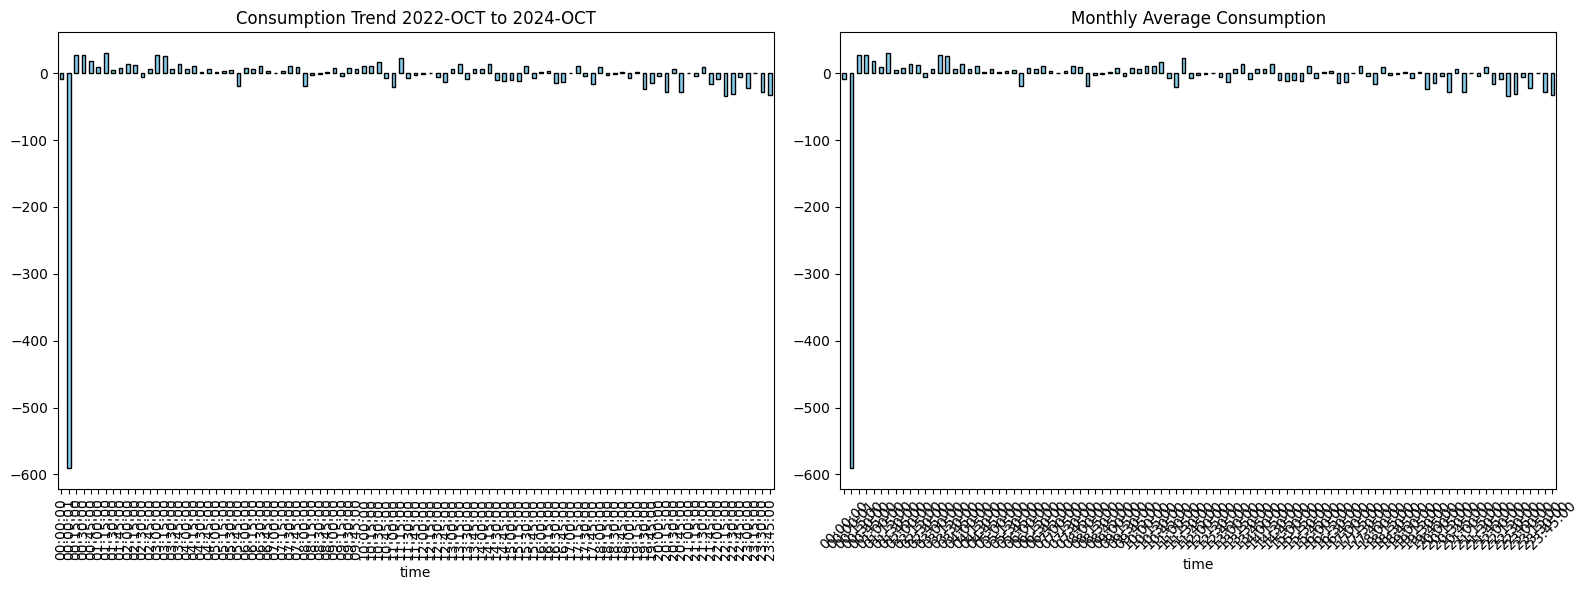

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

daily_import.plot(ax=ax[0], kind='bar', color='skyblue', edgecolor='black')
ax[0].set_title("Consumption Trend 2022-OCT to 2024-OCT")

daily_export.plot(ax=ax[1], kind='bar', color='skyblue', edgecolor='black')
ax[1].set_title("Monthly Average Consumption")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()